In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout

In [49]:
import pandas as pd
kurti = pd.read_csv('/kaggle/working/kurtis.csv')
kurti.head()

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,25778,Kurtis,9,black,straight,knee length,daily,net,solid,solid,three-quarter sleeves,regular,NaN
1,25779,Kurtis,9,red,straight,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN
2,25780,Kurtis,9,red,straight,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN
3,25781,Kurtis,9,navy blue,straight,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN
4,25782,Kurtis,9,black,straight,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN


In [50]:
kurti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822 entries, 0 to 6821
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        6822 non-null   int64  
 1   Category  6822 non-null   object 
 2   len       6822 non-null   int64  
 3   attr_1    6629 non-null   object 
 4   attr_2    3231 non-null   object 
 5   attr_3    3400 non-null   object 
 6   attr_4    6431 non-null   object 
 7   attr_5    3266 non-null   object 
 8   attr_6    3848 non-null   object 
 9   attr_7    3843 non-null   object 
 10  attr_8    6702 non-null   object 
 11  attr_9    6691 non-null   object 
 12  attr_10   0 non-null      float64
dtypes: float64(1), int64(2), object(10)
memory usage: 693.0+ KB


In [51]:
for i in kurti.columns:
  print(len(kurti[i].unique()),kurti[i].unique())

6822 [25778 25779 25780 ... 32598 32599 32600]
1 ['Kurtis']
1 [9]
14 ['black' 'red' 'navy blue' 'maroon' 'green' nan 'pink' 'blue' 'purple'
 'grey' 'yellow' 'white' 'multicolor' 'orange']
3 ['straight' 'a-line' nan]
3 ['knee length' 'calf length' nan]
3 ['daily' 'party' nan]
3 ['net' 'default' nan]
3 ['solid' 'default' nan]
3 ['solid' 'default' nan]
4 ['three-quarter sleeves' 'short sleeves' nan 'sleeveless']
3 ['regular' 'sleeveless' nan]
1 [nan]


In [52]:
column_to_drop = ['len','attr_10']
kurti = kurti.drop(column_to_drop, axis=1)

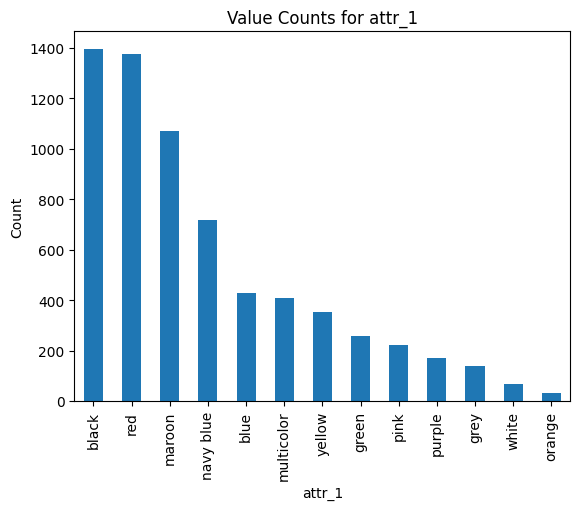

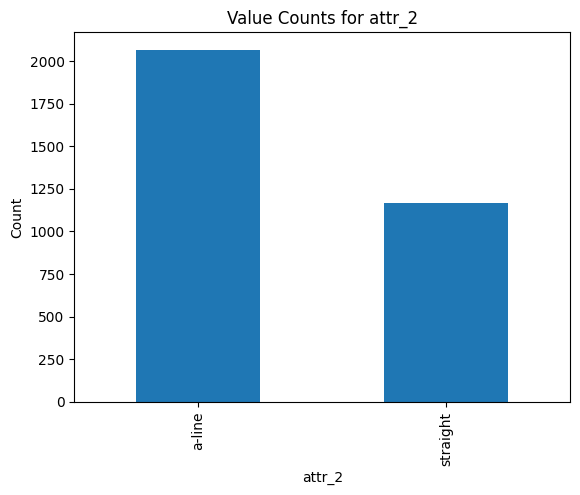

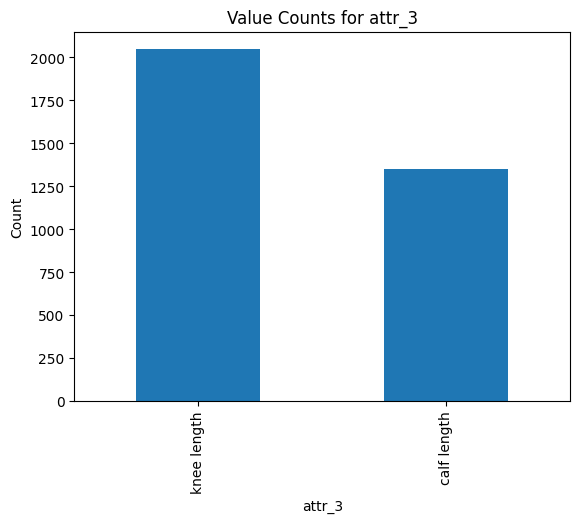

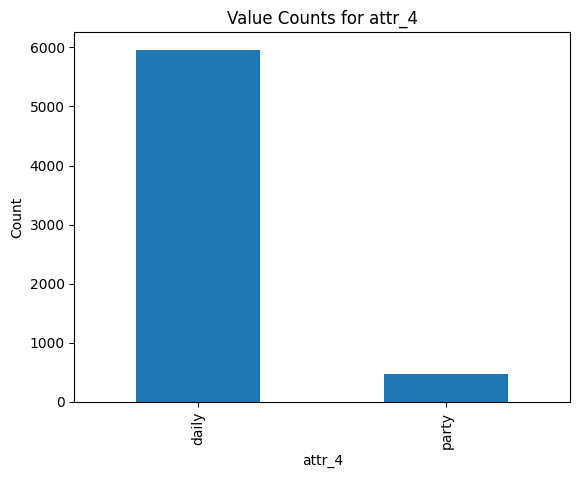

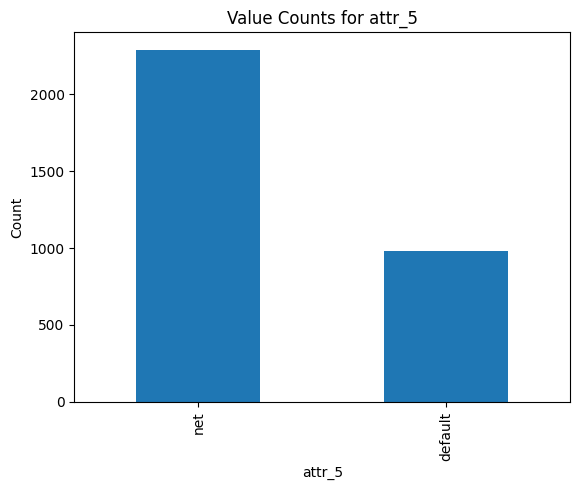

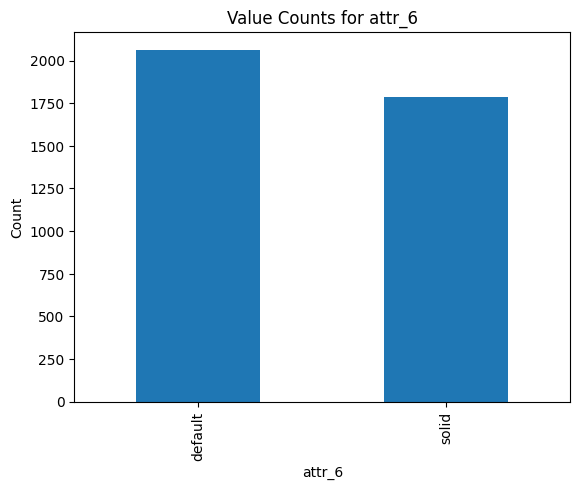

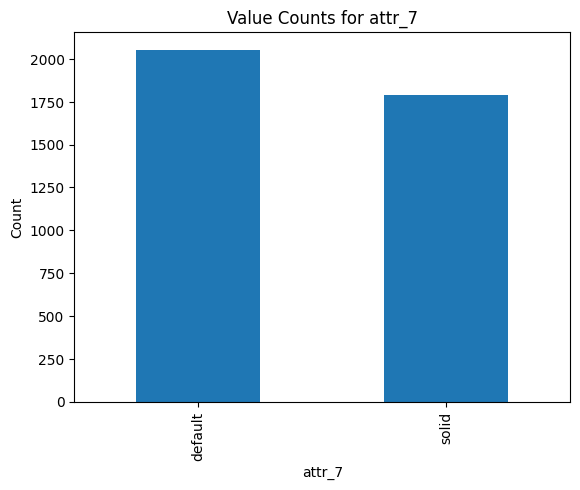

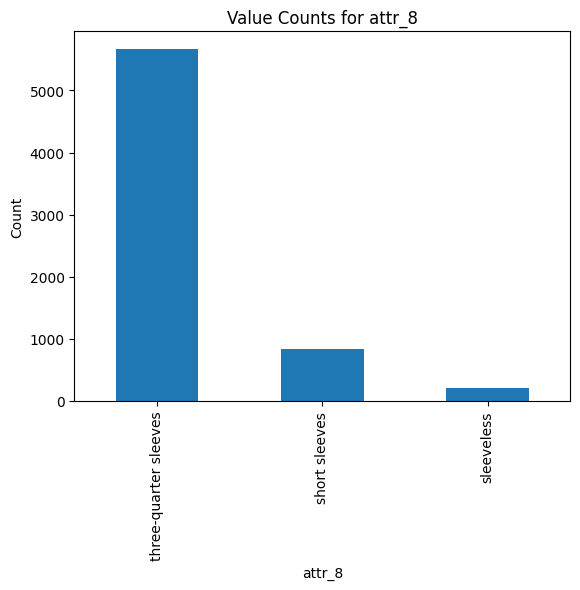

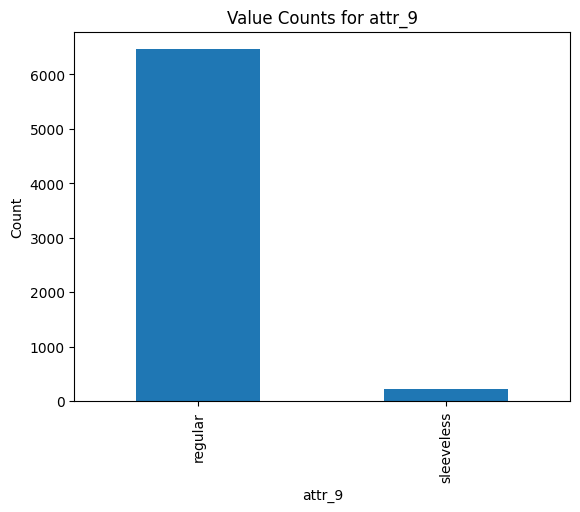

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

for i in kurti.columns:
  if (i!='id') and (i!='Category'):
    vc = kurti[i].value_counts()
    # Check if value_counts() returns a non-empty Series
    if not vc.empty:
        vc.plot(kind='bar')
        plt.title(f'Value Counts for {i}') # Add a title for clarity
        plt.xlabel(i) # Add an x-axis label for clarity
        plt.ylabel('Count') # Add a y-axis label for clarity
        plt.show()
    else:
        print(f"Column '{i}' has no or only one unique value, skipping plot.")

In [54]:
kurti.isnull().mean()*100

id           0.000000
Category     0.000000
attr_1       2.829082
attr_2      52.638522
attr_3      50.161243
attr_4       5.731457
attr_5      52.125476
attr_6      43.594254
attr_7      43.667546
attr_8       1.759015
attr_9       1.920258
dtype: float64

In [55]:
kurti['attr_1'].fillna('black',inplace=True)
kurti['attr_2'].fillna('a-line',inplace=True)
kurti['attr_3'].fillna('knee length',inplace=True)
kurti['attr_4'].fillna('daily',inplace=True)
kurti['attr_5'].fillna('net',inplace=True)
kurti['attr_6'].fillna('solid',inplace=True)
kurti['attr_7'].fillna('solid',inplace=True)
kurti['attr_8'].fillna('three-quarter sleeves',inplace=True)
kurti['attr_9'].fillna('sleeveless',inplace=True)

/tmp/ipykernel_30/3193320355.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kurti['attr_1'].fillna('black',inplace=True)
/tmp/ipykernel_30/3193320355.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [56]:
X3 = kurti.iloc[:,0:2]
y3 = kurti.iloc[:,2:]

In [57]:
for i in y3.columns:
  print(i,y3[i].unique(),len(y3[i].unique()))

attr_1 ['black' 'red' 'navy blue' 'maroon' 'green' 'pink' 'blue' 'purple' 'grey'
 'yellow' 'white' 'multicolor' 'orange'] 13
attr_2 ['straight' 'a-line'] 2
attr_3 ['knee length' 'calf length'] 2
attr_4 ['daily' 'party'] 2
attr_5 ['net' 'default'] 2
attr_6 ['solid' 'default'] 2
attr_7 ['solid' 'default'] 2
attr_8 ['three-quarter sleeves' 'short sleeves' 'sleeveless'] 3
attr_9 ['regular' 'sleeveless'] 2


In [58]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[
    ['black', 'red', 'navy blue', 'maroon', 'green','pink', 'blue', 'purple', 'grey', 'yellow', 'white', 'multicolor', 'orange'],
    ['straight', 'a-line'],
    ['knee length', 'calf length'],
    ['daily', 'party'],
    ['net', 'default'],
    ['solid', 'default'],
    ['solid', 'default'],
    ['three-quarter sleeves', 'short sleeves', 'sleeveless'],
    ['regular', 'sleeveless']
])


In [59]:
y3 = oe.fit_transform(y3)

In [60]:
y3 = pd.DataFrame(y3, columns=kurti.columns[2:])
y3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822 entries, 0 to 6821
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   attr_1  6822 non-null   float64
 1   attr_2  6822 non-null   float64
 2   attr_3  6822 non-null   float64
 3   attr_4  6822 non-null   float64
 4   attr_5  6822 non-null   float64
 5   attr_6  6822 non-null   float64
 6   attr_7  6822 non-null   float64
 7   attr_8  6822 non-null   float64
 8   attr_9  6822 non-null   float64
dtypes: float64(9)
memory usage: 479.8 KB


In [61]:
for i in y3.columns:
  print(i,y3[i].unique(),len(y3[i].unique()))

attr_1 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.] 13
attr_2 [0. 1.] 2
attr_3 [0. 1.] 2
attr_4 [0. 1.] 2
attr_5 [0. 1.] 2
attr_6 [0. 1.] 2
attr_7 [0. 1.] 2
attr_8 [0. 1. 2.] 3
attr_9 [0. 1.] 2


In [62]:
y3 =np.array(y3)

In [63]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
image_dir = '/kaggle/working/train_images'
max_digits = 6
image_paths = [os.path.join(image_dir, f'{i:0{max_digits}}.jpg') for i in range(25778, 32600)]
for path in image_paths:
    if not os.path.exists(path):
        print(f"Missing image: {path}")


def load_and_preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.resize(img, [128, 128])
        img = img / 255.0
        images.append(img)
    return np.array(images)

In [64]:
X3 = load_and_preprocess_images(image_paths)

In [65]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

input_shape = (128, 128, 3)

input_layer = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

# Define output layers for 9 attributes
output_attr1 = Dense(13, activation='softmax', name='attr1_output')(x)
output_attr2 = Dense(2, activation='softmax', name='attr2_output')(x)
output_attr3 = Dense(2, activation='softmax', name='attr3_output')(x)
output_attr4 = Dense(2, activation='softmax', name='attr4_output')(x)
output_attr5 = Dense(2, activation='softmax', name='attr5_output')(x)
output_attr6 = Dense(2, activation='softmax', name='attr6_output')(x)
output_attr7 = Dense(2, activation='softmax', name='attr7_output')(x)
output_attr8 = Dense(3, activation='softmax', name='attr8_output')(x)
output_attr9 = Dense(2, activation='softmax', name='attr9_output')(x)

# Create model with 9 outputs
kurti = Model(inputs=input_layer, outputs=[
    output_attr1, output_attr2, output_attr3,
    output_attr4, output_attr5, output_attr6,
    output_attr7, output_attr8, output_attr9
])

opt = Adam(0.0002)
kurti.compile(optimizer=opt,
              loss={
                  'attr1_output': 'sparse_categorical_crossentropy',
                  'attr2_output': 'sparse_categorical_crossentropy',
                  'attr3_output': 'sparse_categorical_crossentropy',
                  'attr4_output': 'sparse_categorical_crossentropy',
                  'attr5_output': 'sparse_categorical_crossentropy',
                  'attr6_output': 'sparse_categorical_crossentropy',
                  'attr7_output': 'sparse_categorical_crossentropy',
                  'attr8_output': 'sparse_categorical_crossentropy',
                  'attr9_output': 'sparse_categorical_crossentropy'
              },
              metrics={
                  'attr1_output': 'accuracy',
                  'attr2_output': 'accuracy',
                  'attr3_output': 'accuracy',
                  'attr4_output': 'accuracy',
                  'attr5_output': 'accuracy',
                  'attr6_output': 'accuracy',
                  'attr7_output': 'accuracy',
                  'attr8_output': 'accuracy',
                  'attr9_output': 'accuracy'
              })

kurti.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 126, 126,  │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 63, 63,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │        128 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 63, 63,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 61, 61,    │     18,496 │ dropout_4[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 61, 61,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 59, 59,    │     73,856 │ dropout_5[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 59, 59,    │        512 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 59, 59,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 445568)    │          0 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │ 57,032,832 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dropout_7[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr1_output        │ (None, 13)        │      1,677 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr2_output        │ (None, 2)         │        258 │ batch_normalizat… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attr3_output        │ (None, 2)         │        258 │ batch_normalizat

 Total params: 57,131,358 (217.94 MB)

 Trainable params: 57,130,654 (217.94 MB)

 Non-trainable params: 704 (2.75 KB)

In [66]:
X3_filtered = X3
y3_filtered = y3
X3_filtered.shape,y3_filtered.shape
#


((6822, 128, 128, 3), (6822, 9))

In [67]:
X3_train, X3_val, y3_train, y3_val = train_test_split(
    X3_filtered, y3_filtered, test_size=0.2, random_state=42
)

In [68]:
y3_train_attr1 = y3_train[:, 0]
y3_train_attr2 = y3_train[:, 1]
y3_train_attr3 = y3_train[:, 2]
y3_train_attr4 = y3_train[:, 3]
y3_train_attr5 = y3_train[:, 4]
y3_train_attr6 = y3_train[:, 5]
y3_train_attr7 = y3_train[:, 6]
y3_train_attr8 = y3_train[:, 7]
y3_train_attr9 = y3_train[:, 8]


In [69]:
y3_val_attr1 = y3_val[:, 0]
y3_val_attr2 = y3_val[:, 1]
y3_val_attr3 = y3_val[:, 2]
y3_val_attr4 = y3_val[:, 3]
y3_val_attr5 = y3_val[:, 4]
y3_val_attr6 = y3_val[:, 5]
y3_val_attr7 = y3_val[:, 6]
y3_val_attr8 = y3_val[:, 7]
y3_val_attr9 = y3_val[:, 8]


In [71]:
batch_size = 64
epochs = 10
kurti.fit(X3_train,
          [y3_train_attr1, y3_train_attr2, y3_train_attr3, y3_train_attr4, y3_train_attr5, y3_train_attr6, y3_train_attr7, y3_train_attr8, y3_train_attr9],
          validation_data=(X3_val,
                           [y3_val_attr1, y3_val_attr2, y3_val_attr3, y3_val_attr4, y3_val_attr5, y3_val_attr6, y3_val_attr7, y3_val_attr8, y3_val_attr9]),
          batch_size=batch_size,
          epochs=epochs)


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - attr1_output_accuracy: 0.7105 - attr2_output_accuracy: 0.9086 - attr3_output_accuracy: 0.8324 - attr4_output_accuracy: 0.9277 - attr5_output_accuracy: 0.9271 - attr6_output_accuracy: 0.9049 - attr7_output_accuracy: 0.8985 - attr8_output_accuracy: 0.9032 - attr9_output_accuracy: 0.9563 - loss: 3.1088 - val_attr1_output_accuracy: 0.6989 - val_attr2_output_accuracy: 0.9062 - val_attr3_output_accuracy: 0.8264 - val_attr4_output_accuracy: 0.9443 - val_attr5_output_accuracy: 0.9150 - val_attr6_output_accuracy: 0.8886 - val_attr7_output_accuracy: 0.8718 - val_attr8_output_accuracy: 0.9275 - val_attr9_output_accuracy: 0.9773 - val_loss: 3.4303
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - attr1_output_accuracy: 0.7164 - attr2_output_accuracy: 0.9115 - attr3_output_accuracy: 0.8432 - attr4_output_accuracy: 0.9312 - attr5_output_accuracy: 0.9228 - attr6_output_accuracy: 0.9094 - attr7_output_accuracy: 0.9088 - attr8_output_accuracy: 0.9

In [72]:
kurti.save('kurti_weights.keras')

In [73]:
from sklearn.preprocessing import LabelEncoder

# Assuming these are the LabelEncoders used during encoding
attr1_encoder = LabelEncoder()
attr2_encoder = LabelEncoder()
attr3_encoder = LabelEncoder()
attr4_encoder = LabelEncoder()
attr5_encoder = LabelEncoder()
attr6_encoder = LabelEncoder()
attr7_encoder = LabelEncoder()
attr8_encoder = LabelEncoder()
attr9_encoder = LabelEncoder()
 
# Fit the encoders with the classes if not already done (replace with actual classes)
attr1_encoder.fit(y3_train_attr1)
attr2_encoder.fit(y3_train_attr2)
attr3_encoder.fit(y3_train_attr3)
attr4_encoder.fit(y3_train_attr4)
attr5_encoder.fit(y3_train_attr5)
attr6_encoder.fit(y3_train_attr6)
attr7_encoder.fit(y3_train_attr7)
attr8_encoder.fit(y3_train_attr8)
attr9_encoder.fit(y3_train_attr9)
 

predictions = []

# Get model predictions for all attributes
pred_attr1, pred_attr2, pred_attr3, pred_attr4, pred_attr5,pred_attr6,pred_attr7,pred_attr8,pred_attr9= kurti.predict(X3_val)

# Iterate over each sample and decode predictions
for i in range(len(X3_val)):
    predicted_attr1_label = attr1_encoder.inverse_transform([np.argmax(pred_attr1[i], axis=0)])[0]
    predicted_attr2_label = attr2_encoder.inverse_transform([np.argmax(pred_attr2[i], axis=0)])[0]
    predicted_attr3_label = attr3_encoder.inverse_transform([np.argmax(pred_attr3[i], axis=0)])[0]
    predicted_attr4_label = attr4_encoder.inverse_transform([np.argmax(pred_attr4[i], axis=0)])[0]
    predicted_attr5_label = attr5_encoder.inverse_transform([np.argmax(pred_attr5[i], axis=0)])[0]
    predicted_attr6_label = attr6_encoder.inverse_transform([np.argmax(pred_attr6[i], axis=0)])[0]
    predicted_attr7_label = attr7_encoder.inverse_transform([np.argmax(pred_attr7[i], axis=0)])[0]
    predicted_attr8_label = attr8_encoder.inverse_transform([np.argmax(pred_attr8[i], axis=0)])[0]
    predicted_attr9_label = attr9_encoder.inverse_transform([np.argmax(pred_attr9[i], axis=0)])[0]
       

    predictions.append((
        predicted_attr1_label,
        predicted_attr2_label,
        predicted_attr3_label,
        predicted_attr4_label,
        predicted_attr5_label,
        predicted_attr6_label,
        predicted_attr7_label,
        predicted_attr8_label,
        predicted_attr9_label,
     ))

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=[
    "Attribute 1", "Attribute 2", "Attribute 3", "Attribute 4", "Attribute 5","Attribute 6","Attribute 7","Attribute 8","Attribute 9"
])

# Preview the DataFrame
print(predictions_df.head())


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
   Attribute 1  Attribute 2  Attribute 3  Attribute 4  Attribute 5  \
0          0.0          1.0          0.0          0.0          0.0   
1          9.0          1.0          0.0          0.0          0.0   
2          3.0          1.0          0.0          0.0          0.0   
3          3.0          1.0          0.0          0.0          0.0   
4         11.0          1.0          0.0          0.0          0.0   

   Attribute 6  Attribute 7  Attribute 8  Attribute 9  
0          0.0          0.0          0.0          0.0  
1          0.0          0.0          0.0          0.0  
2          0.0          0.0          0.0          0.0  
3          0.0          0.0          1.0          0.0  
4          1.0          1.0          0.0          0.0  


In [74]:

from sklearn.metrics import f1_score

# Initialize lists to store attribute-wise scores
micro_f1_scores = []
macro_f1_scores = []

# Iterate through each attribute's ground truth and predictions
for i, (y_true_attr, y_pred_attr) in enumerate(zip(
        [y3_val_attr1, y3_val_attr2, y3_val_attr3, y3_val_attr4, y3_val_attr5,y3_val_attr6,y3_val_attr7,y3_val_attr8,y3_val_attr9],
        [predictions_df["Attribute 1"], 
         predictions_df["Attribute 2"], 
         predictions_df["Attribute 3"], 
         predictions_df["Attribute 4"], 
         predictions_df["Attribute 5"],
         predictions_df["Attribute 6"],
         predictions_df["Attribute 7"],
         predictions_df["Attribute 8"],
         predictions_df["Attribute 9"]
         ])):
    
    # Calculate F1-scores for this attribute
    micro_f1 = f1_score(y_true_attr, y_pred_attr, average='micro')
    macro_f1 = f1_score(y_true_attr, y_pred_attr, average='macro')
    
    # Store the results
    micro_f1_scores.append(micro_f1)
    macro_f1_scores.append(macro_f1)


# Print overall summary
print("\nSummary of Attribute-Wise F1-Scores:")
for i in range(len(micro_f1_scores)):
    print(f"Attribute {i + 1}: Micro F1 = {micro_f1_scores[i]:.4f}, Macro F1 = {macro_f1_scores[i]:.4f}")



Summary of Attribute-Wise F1-Scores:
Attribute 1: Micro F1 = 0.6996, Macro F1 = 0.5841
Attribute 2: Micro F1 = 0.9121, Macro F1 = 0.8305
Attribute 3: Micro F1 = 0.8183, Macro F1 = 0.6383
Attribute 4: Micro F1 = 0.9407, Macro F1 = 0.6061
Attribute 5: Micro F1 = 0.9062, Macro F1 = 0.7923
Attribute 6: Micro F1 = 0.8828, Macro F1 = 0.8581
Attribute 7: Micro F1 = 0.8645, Macro F1 = 0.8361
Attribute 8: Micro F1 = 0.9282, Macro F1 = 0.8530
Attribute 9: Micro F1 = 0.9773, Macro F1 = 0.8593


In [ ]:
test = pd.read_csv('/kaggle/working/s2.csv')

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the class labels for each of the 9 new attributes
attr1_classes = ['black', 'red', 'navy blue', 'maroon', 'green', 'pink', 'blue', 'purple', 'grey', 'yellow', 'white', 'multicolor', 'orange']
attr2_classes = ['straight', 'a-line']
attr3_classes = ['knee length', 'calf length']
attr4_classes = ['daily', 'party']
attr5_classes = ['net', 'default']
attr6_classes = ['solid', 'default']
attr7_classes = ['solid', 'default']
attr8_classes = ['three-quarter sleeves', 'short sleeves', 'sleeveless']
attr9_classes = ['regular', 'sleeveless']

# Set the directory for test images
test_image_dir = '/kaggle/input/visual-taxonomy/test_images'  # Adjust this path as necessary

# Load test data from CSV
test_csv_path = '/kaggle/input/visual-taxonomy/test.csv'  # Adjust this path as necessary
df = pd.read_csv(test_csv_path)

# Check if the DataFrame contains the expected columns
print(df.head())  # Debugging output

# Get the desired range of entries
df_sample = df[10889:13349]

# Prepare a list to hold the images and predictions
predictions = []

# Loop through the images
for index, row in df_sample.iterrows():
    image_file = f"{int(row['id']):06}.jpg"  # Assuming the CSV has an 'id' column
    image_path = os.path.join(test_image_dir, image_file)

    # Check if the image exists
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        continue

    # Load and preprocess the image
    test_img = cv2.imread(image_path)
    if test_img is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Resize and reshape the image
    test_img_resized = cv2.resize(test_img, (128, 128))
    test_input = test_img_resized.reshape((1, 128, 128, 3)) / 255.0  # Normalize

    # Make predictions for each attribute
    preds = kurti.predict(test_input)  # Assuming this returns a list of 9 predictions
    predicted_indices = [np.argmax(pred, axis=1)[0] for pred in preds]

    # Store predictions by mapping indices to class labels
    predictions.append((
        image_file,
        attr1_classes[predicted_indices[0]],
        attr2_classes[predicted_indices[1]],
        attr3_classes[predicted_indices[2]],
        attr4_classes[predicted_indices[3]],
        attr5_classes[predicted_indices[4]],
        attr6_classes[predicted_indices[5]],
        attr7_classes[predicted_indices[6]],
        attr8_classes[predicted_indices[7]],
        attr9_classes[predicted_indices[8]]
    ))

    # Update DataFrame with predicted labels
    test.loc[index, 'attr_1'] = attr1_classes[predicted_indices[0]]
    test.loc[index, 'attr_2'] = attr2_classes[predicted_indices[1]]
    test.loc[index, 'attr_3'] = attr3_classes[predicted_indices[2]]
    test.loc[index, 'attr_4'] = attr4_classes[predicted_indices[3]]
    test.loc[index, 'attr_5'] = attr5_classes[predicted_indices[4]]
    test.loc[index, 'attr_6'] = attr6_classes[predicted_indices[5]]
    test.loc[index, 'attr_7'] = attr7_classes[predicted_indices[6]]
    test.loc[index, 'attr_8'] = attr8_classes[predicted_indices[7]]
    test.loc[index, 'attr_9'] = attr9_classes[predicted_indices[8]]
    test.loc[index, 'len'] = 9

# Convert the predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['id', 'attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9'])

In [ ]:
test.to_csv('s3.csv')

-----------------------------------------THE END----------------------------------------------